In [1]:
pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

Chargement du dataset Wine Quality...
Dataset chargé: 6497 lignes, 13 colonnes



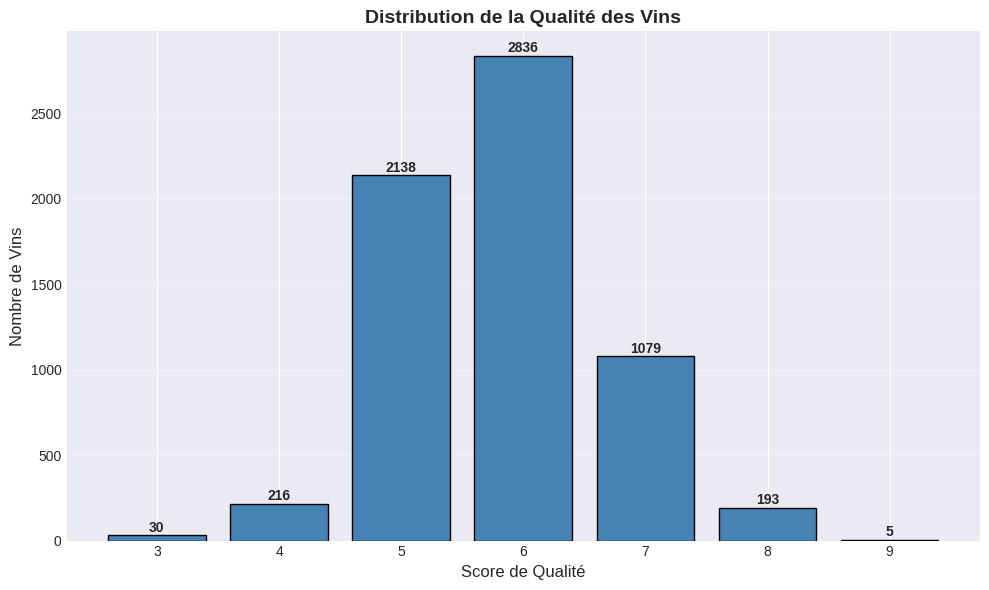

✓ Graphique 1 créé: Distribution de la qualité


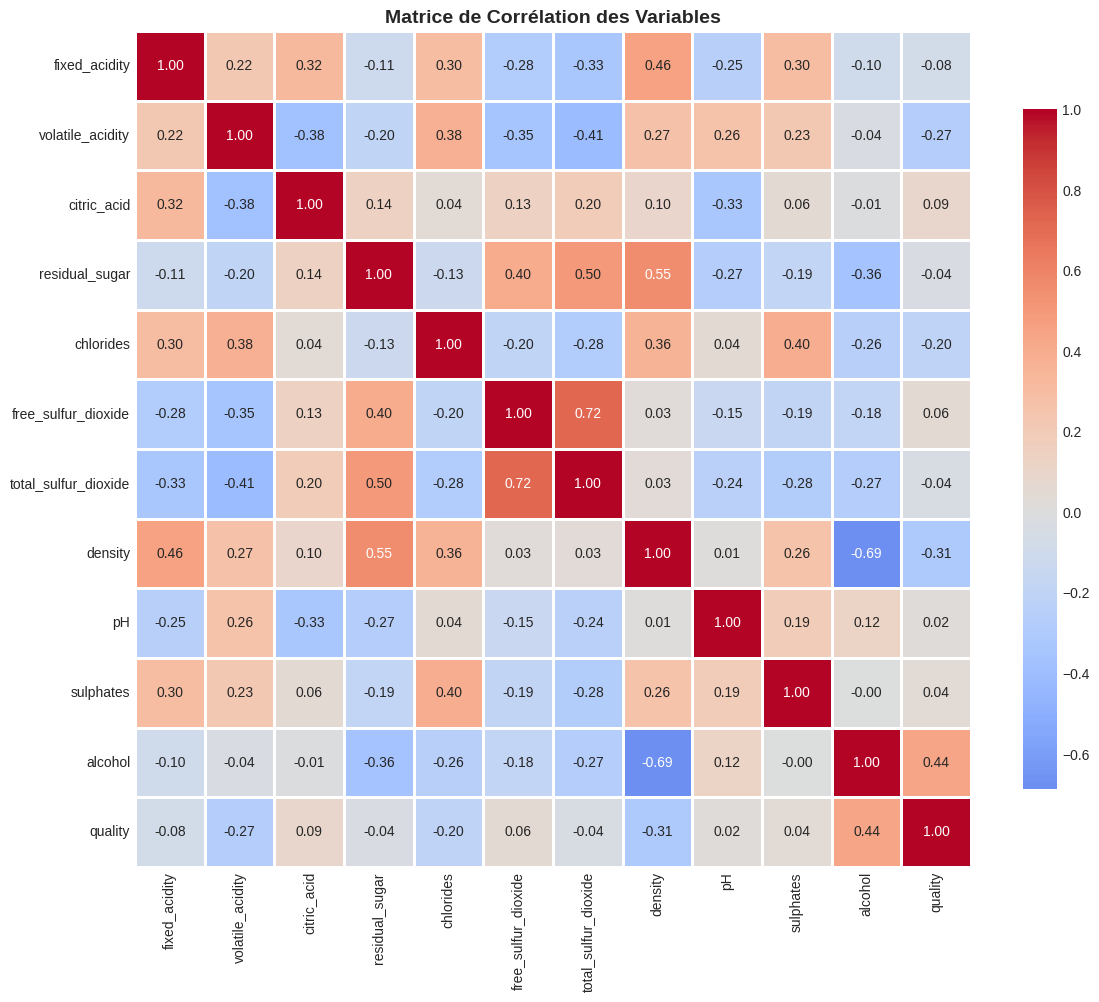

✓ Graphique 2 créé: Matrice de corrélation


ValueError: could not convert string to float: 'red'

<Figure size 1000x800 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Chargement du dataset
print("Chargement du dataset Wine Quality...")
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

# Combinaison des features et de la target
df = pd.concat([X, y], axis=1)

# Ajout de la colonne color si disponible
if hasattr(wine_quality.data, 'original'):
    df_original = wine_quality.data.original
    if 'color' in df_original.columns:
        df['color'] = df_original['color']

print(f"Dataset chargé: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print("\n" + "="*70)

# ============================================================================
# GRAPHIQUE 1: Distribution de la qualité des vins
# ============================================================================
plt.figure(figsize=(10, 6))
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Score de Qualité', fontsize=12)
plt.ylabel('Nombre de Vins', fontsize=12)
plt.title('Distribution de la Qualité des Vins', fontsize=14, fontweight='bold')
plt.xticks(quality_counts.index)
plt.grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(quality_counts.values):
    plt.text(quality_counts.index[i], v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('1_distribution_qualite.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 1 créé: Distribution de la qualité")

# ============================================================================
# GRAPHIQUE 2: Matrice de corrélation
# ============================================================================
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('2_matrice_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 2 créé: Matrice de corrélation")

# ============================================================================
# GRAPHIQUE 3: Corrélation avec la qualité
# ============================================================================
plt.figure(figsize=(10, 8))
correlation_with_quality = df.corr()['quality'].drop('quality').sort_values()
colors = ['red' if x < 0 else 'green' for x in correlation_with_quality]
correlation_with_quality.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Coefficient de Corrélation', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title('Corrélation des Variables avec la Qualité', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('3_correlation_qualite.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 3 créé: Corrélation avec la qualité")

# ============================================================================
# GRAPHIQUE 4: Distribution des variables principales (histogrammes)
# ============================================================================
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

numeric_columns = df.select_dtypes(include=[np.number]).columns
for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_xlabel('Valeur')
        axes[idx].set_ylabel('Fréquence')
        axes[idx].grid(axis='y', alpha=0.3)

# Masquer les axes non utilisés
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution de Toutes les Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('4_distributions_variables.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 4 créé: Distributions des variables")

# ============================================================================
# GRAPHIQUE 5: Boxplots - Qualité vs Variables Clés
# ============================================================================
key_features = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        df.boxplot(column=feature, by='quality', ax=axes[idx])
        axes[idx].set_title(f'{feature} par Qualité', fontweight='bold')
        axes[idx].set_xlabel('Score de Qualité')
        axes[idx].set_ylabel(feature)
        axes[idx].get_figure().suptitle('')

plt.suptitle('Relation entre Variables Clés et Qualité', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('5_boxplots_qualite.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 5 créé: Boxplots par qualité")

# ============================================================================
# GRAPHIQUE 6: Comparaison Vins Rouges vs Blancs (si disponible)
# ============================================================================
if 'color' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Graphique 1: Distribution de la qualité par couleur
    df.groupby(['color', 'quality']).size().unstack(fill_value=0).plot(
        kind='bar', ax=axes[0, 0], color=['#8B0000', '#FFD700'])
    axes[0, 0].set_title('Distribution de la Qualité par Type de Vin', fontweight='bold')
    axes[0, 0].set_xlabel('Type de Vin')
    axes[0, 0].set_ylabel('Nombre de Vins')
    axes[0, 0].legend(title='Qualité', bbox_to_anchor=(1.05, 1))

    # Graphique 2: Alcool par couleur
    df.boxplot(column='alcohol', by='color', ax=axes[0, 1])
    axes[0, 1].set_title('Teneur en Alcool par Type de Vin', fontweight='bold')
    axes[0, 1].set_xlabel('Type de Vin')
    axes[0, 1].set_ylabel('Alcool (%)')
    axes[0, 1].get_figure().suptitle('')

    # Graphique 3: pH par couleur
    df.boxplot(column='pH', by='color', ax=axes[1, 0])
    axes[1, 0].set_title('pH par Type de Vin', fontweight='bold')
    axes[1, 0].set_xlabel('Type de Vin')
    axes[1, 0].set_ylabel('pH')
    axes[1, 0].get_figure().suptitle('')

    # Graphique 4: Qualité moyenne par couleur
    quality_by_color = df.groupby('color')['quality'].mean()
    quality_by_color.plot(kind='bar', ax=axes[1, 1], color=['#8B0000', '#FFD700'], edgecolor='black')
    axes[1, 1].set_title('Qualité Moyenne par Type de Vin', fontweight='bold')
    axes[1, 1].set_xlabel('Type de Vin')
    axes[1, 1].set_ylabel('Qualité Moyenne')
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

    plt.suptitle('Comparaison Vins Rouges vs Blancs', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('6_comparaison_rouge_blanc.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Graphique 6 créé: Comparaison rouge vs blanc")
else:
    print("⚠ Variable 'color' non disponible - Graphique 6 ignoré")

# ============================================================================
# GRAPHIQUE 7: Scatter plots - Relations entre variables
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Alcool vs Qualité
axes[0, 0].scatter(df['alcohol'], df['quality'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[0, 0].set_xlabel('Alcool (%)')
axes[0, 0].set_ylabel('Qualité')
axes[0, 0].set_title('Alcool vs Qualité', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Acidité volatile vs Qualité
axes[0, 1].scatter(df['volatile_acidity'], df['quality'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[0, 1].set_xlabel('Acidité Volatile')
axes[0, 1].set_ylabel('Qualité')
axes[0, 1].set_title('Acidité Volatile vs Qualité', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Sulphates vs Alcool
scatter = axes[1, 0].scatter(df['sulphates'], df['alcohol'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[1, 0].set_xlabel('Sulphates')
axes[1, 0].set_ylabel('Alcool (%)')
axes[1, 0].set_title('Sulphates vs Alcool', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# pH vs Acidité fixe
axes[1, 1].scatter(df['pH'], df['fixed_acidity'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[1, 1].set_xlabel('pH')
axes[1, 1].set_ylabel('Acidité Fixe')
axes[1, 1].set_title('pH vs Acidité Fixe', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Qualité')
plt.suptitle('Relations entre Variables Principales', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('7_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 7 créé: Scatter plots")

# ============================================================================
# STATISTIQUES RÉCAPITULATIVES
# ============================================================================
print("\n" + "="*70)
print("STATISTIQUES DESCRIPTIVES")
print("="*70)
print(df.describe())

print("\n" + "="*70)
print("RÉPARTITION PAR QUALITÉ")
print("="*70)
print(df['quality'].value_counts().sort_index())

if 'color' in df.columns:
    print("\n" + "="*70)
    print("RÉPARTITION PAR TYPE DE VIN")
    print("="*70)
    print(df['color'].value_counts())

print("\n" + "="*70)
print("✓ Tous les graphiques ont été créés avec succès!")
print("✓ Les fichiers PNG ont été sauvegardés dans le répertoire courant")
print("="*70)

Chargement du dataset Wine Quality...
Dataset chargé: 6497 lignes, 13 colonnes



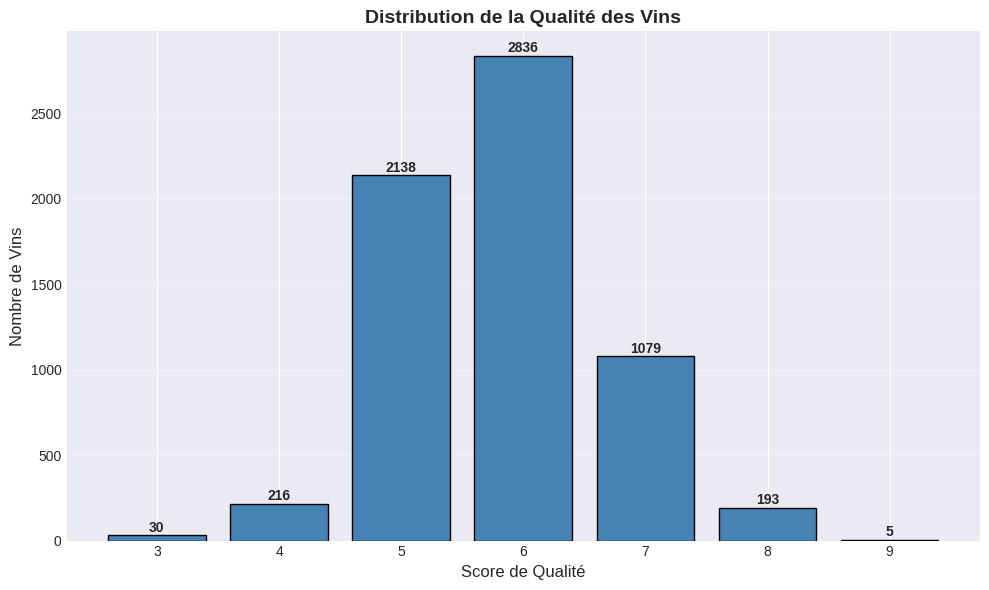

✓ Graphique 1 créé: Distribution de la qualité


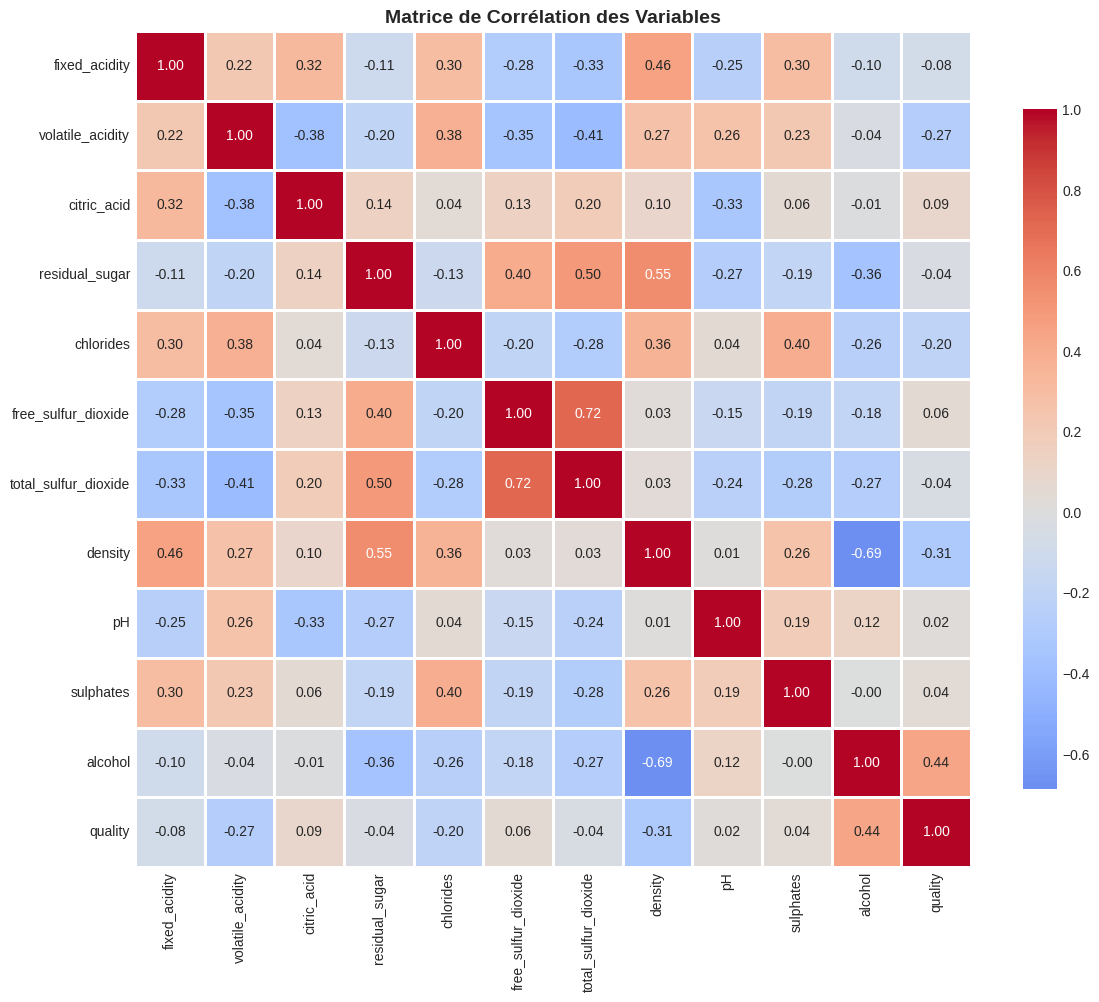

✓ Graphique 2 créé: Matrice de corrélation


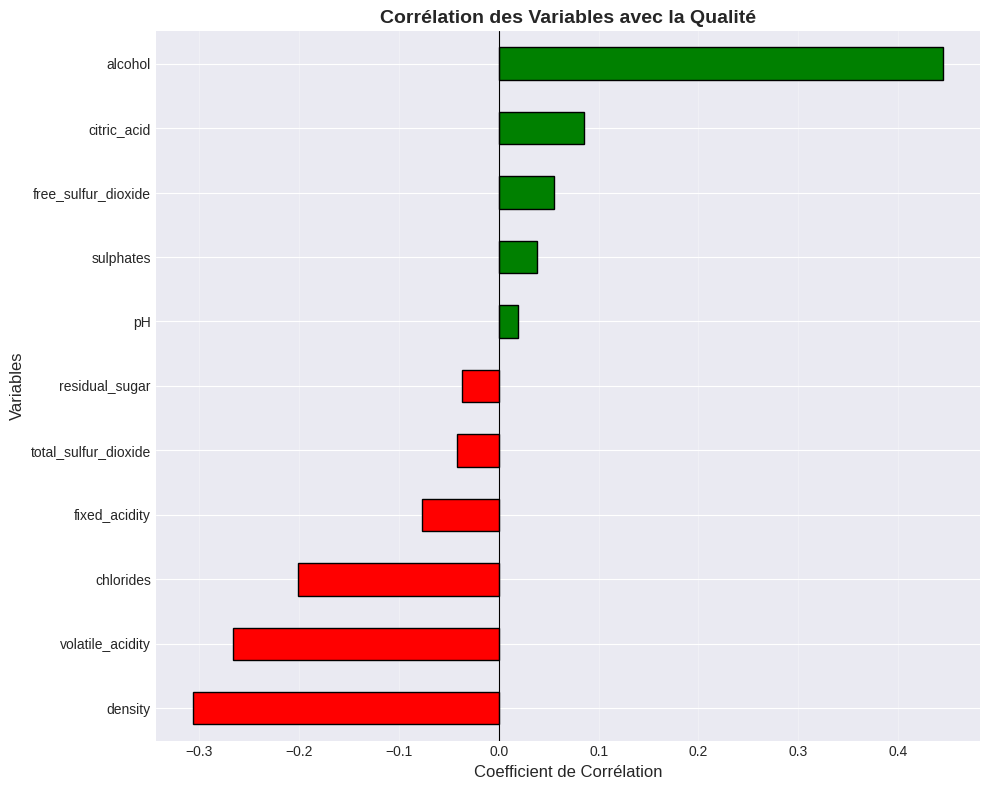

✓ Graphique 3 créé: Corrélation avec la qualité


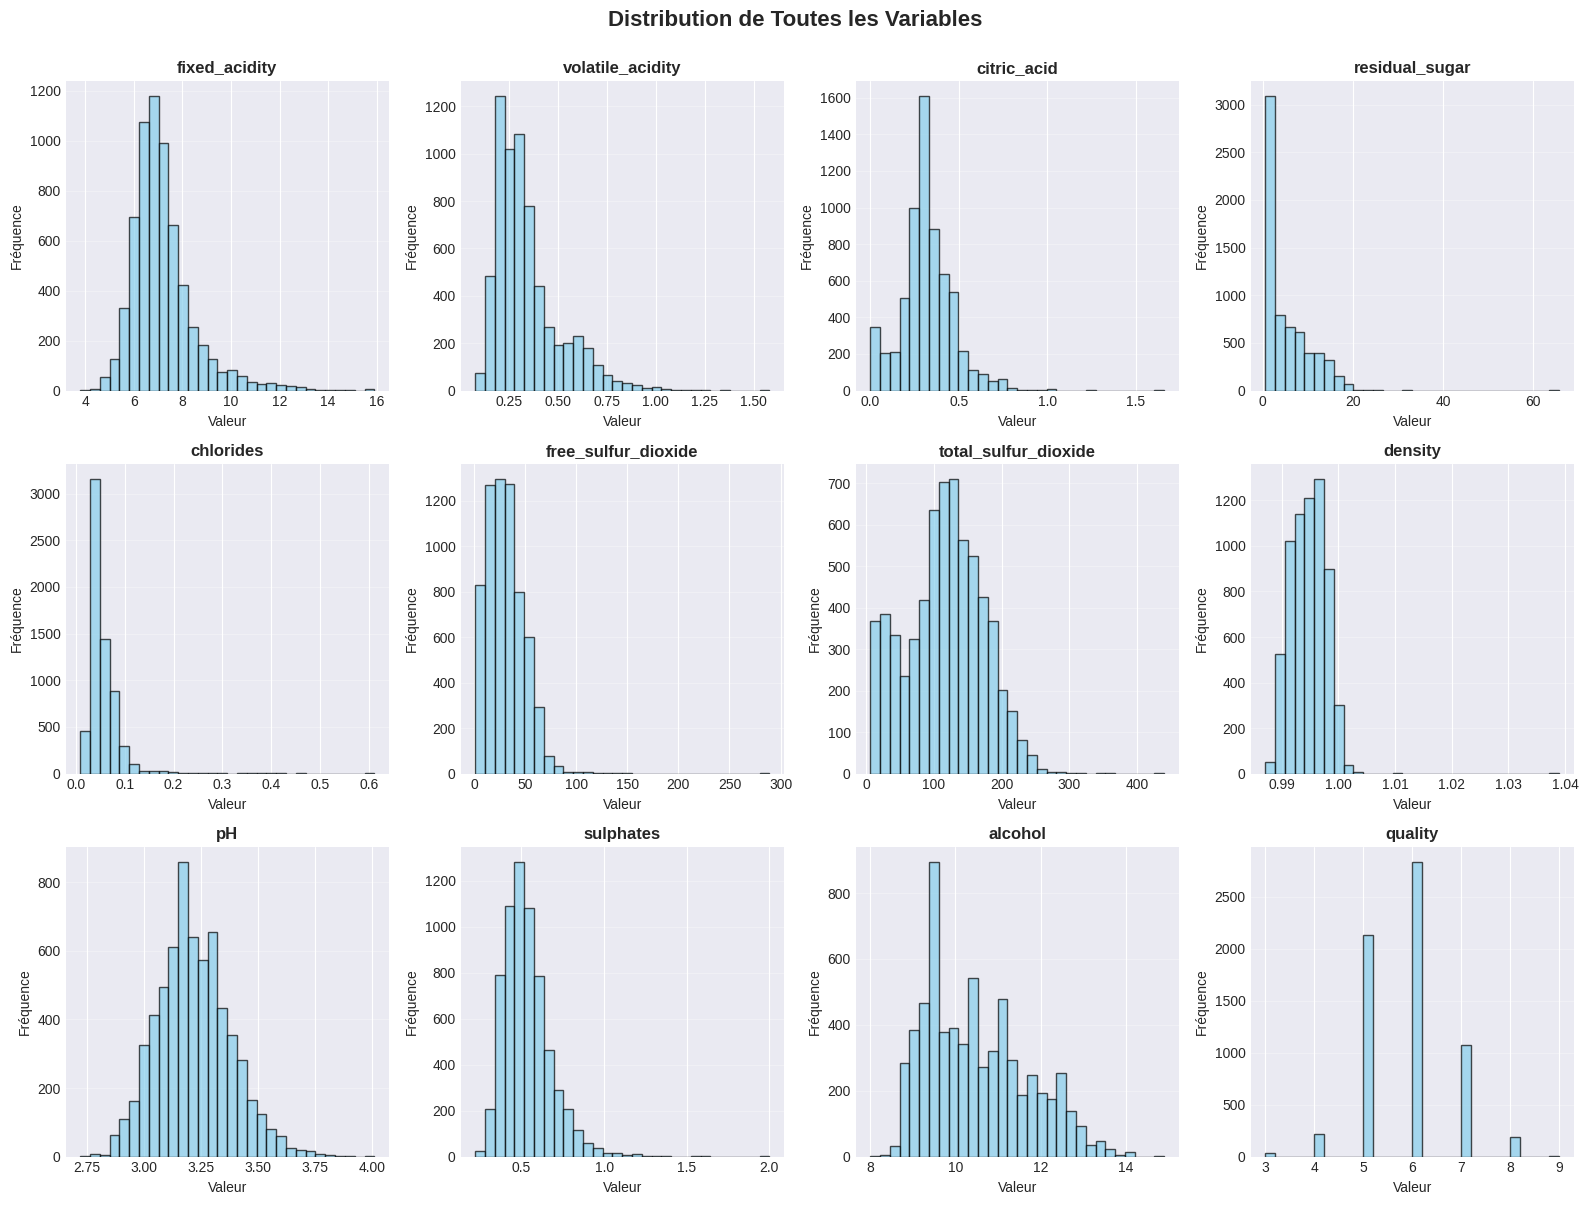

✓ Graphique 4 créé: Distributions des variables


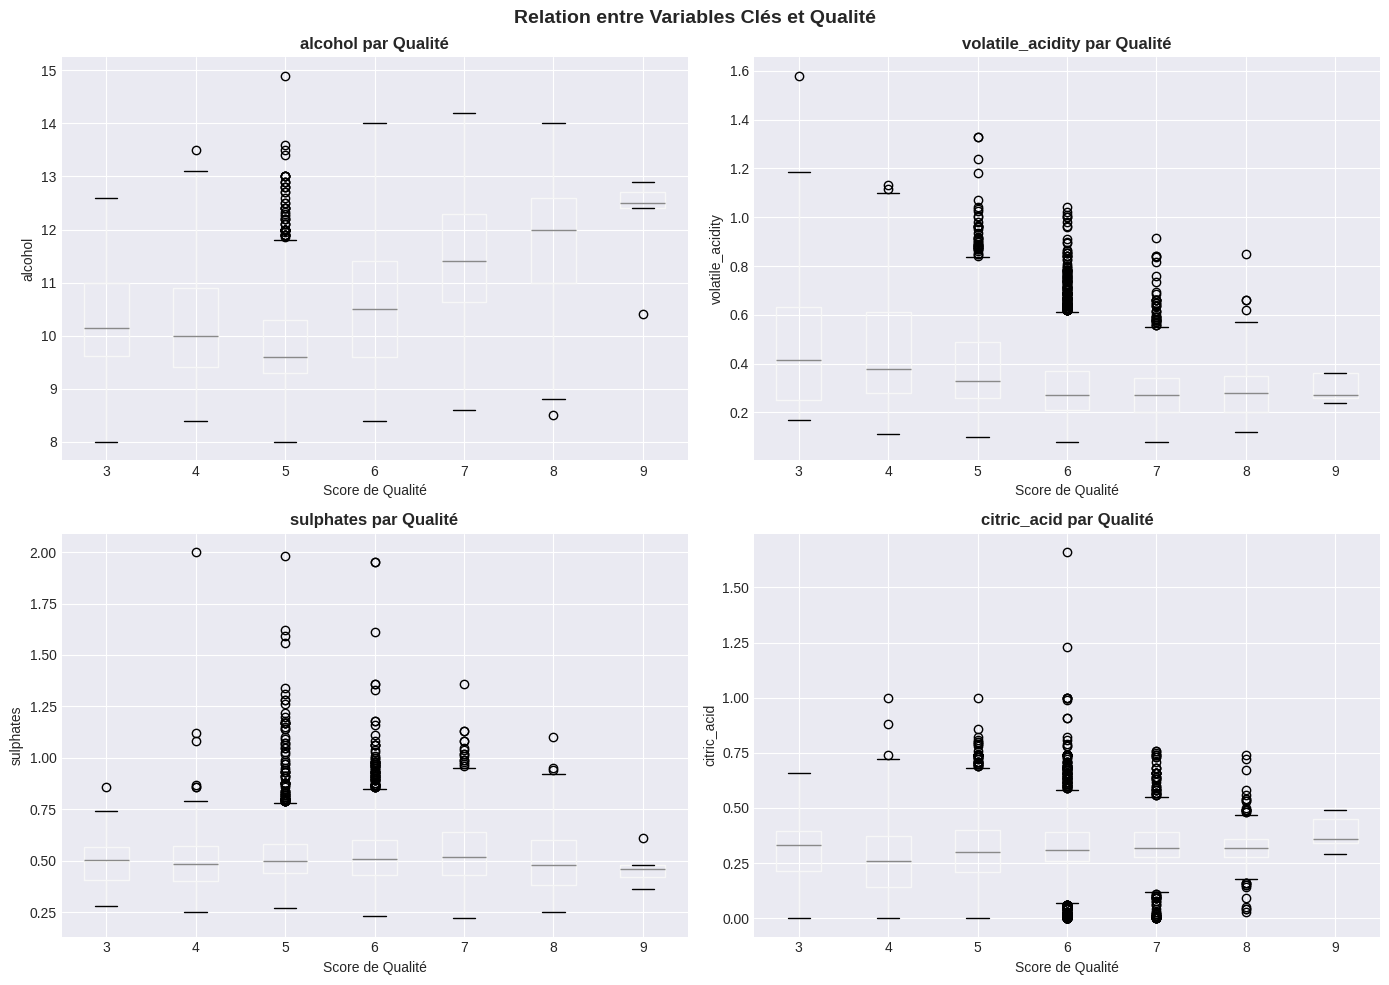

✓ Graphique 5 créé: Boxplots par qualité


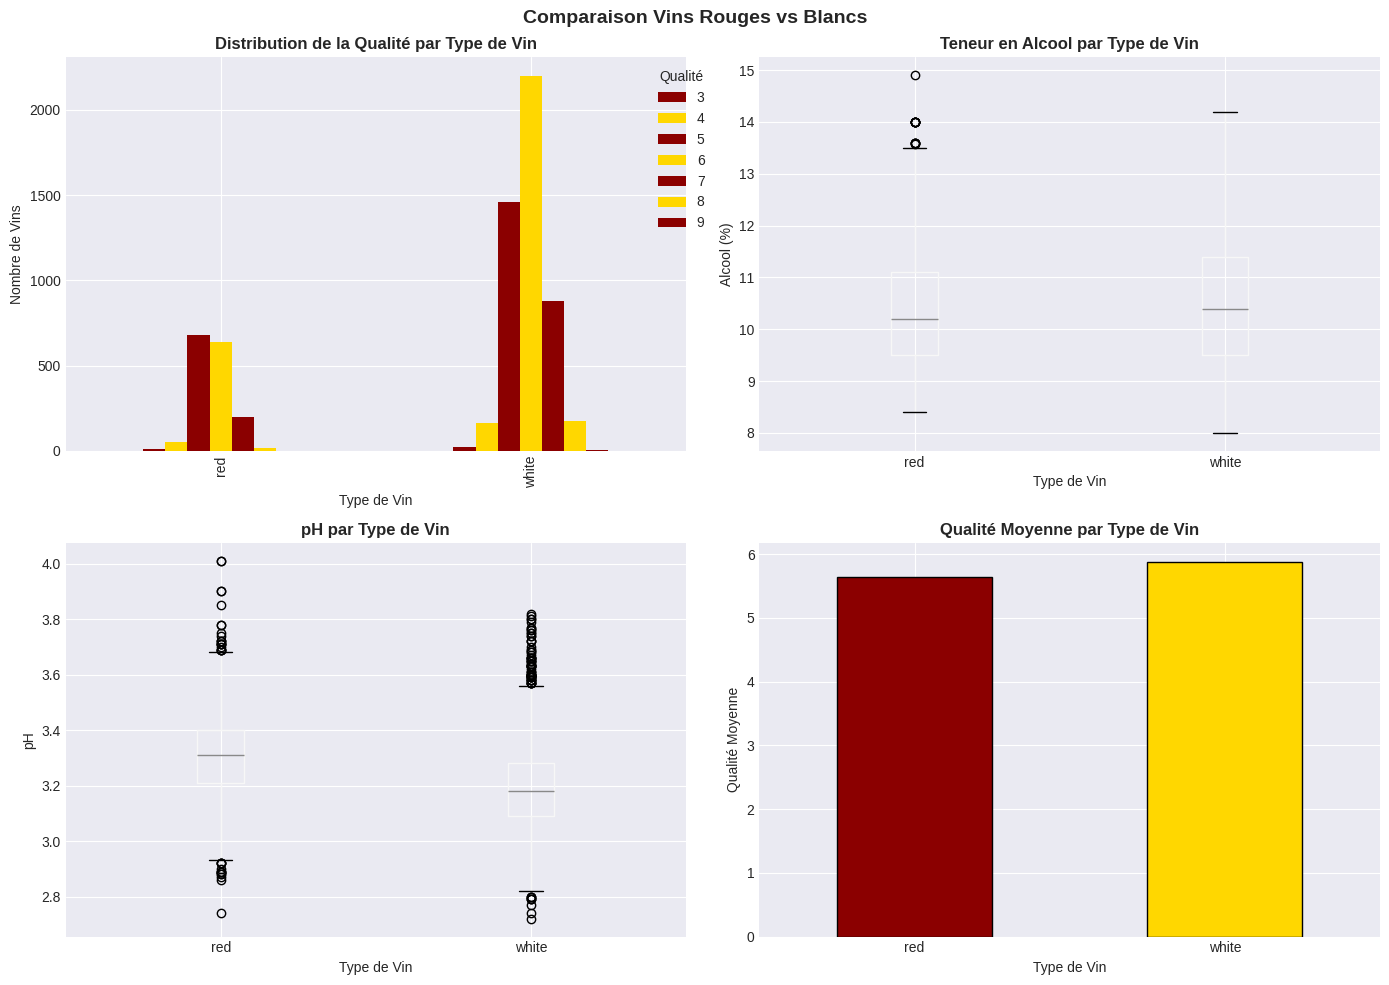

✓ Graphique 6 créé: Comparaison rouge vs blanc


/tmp/ipython-input-104115357.py:207: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


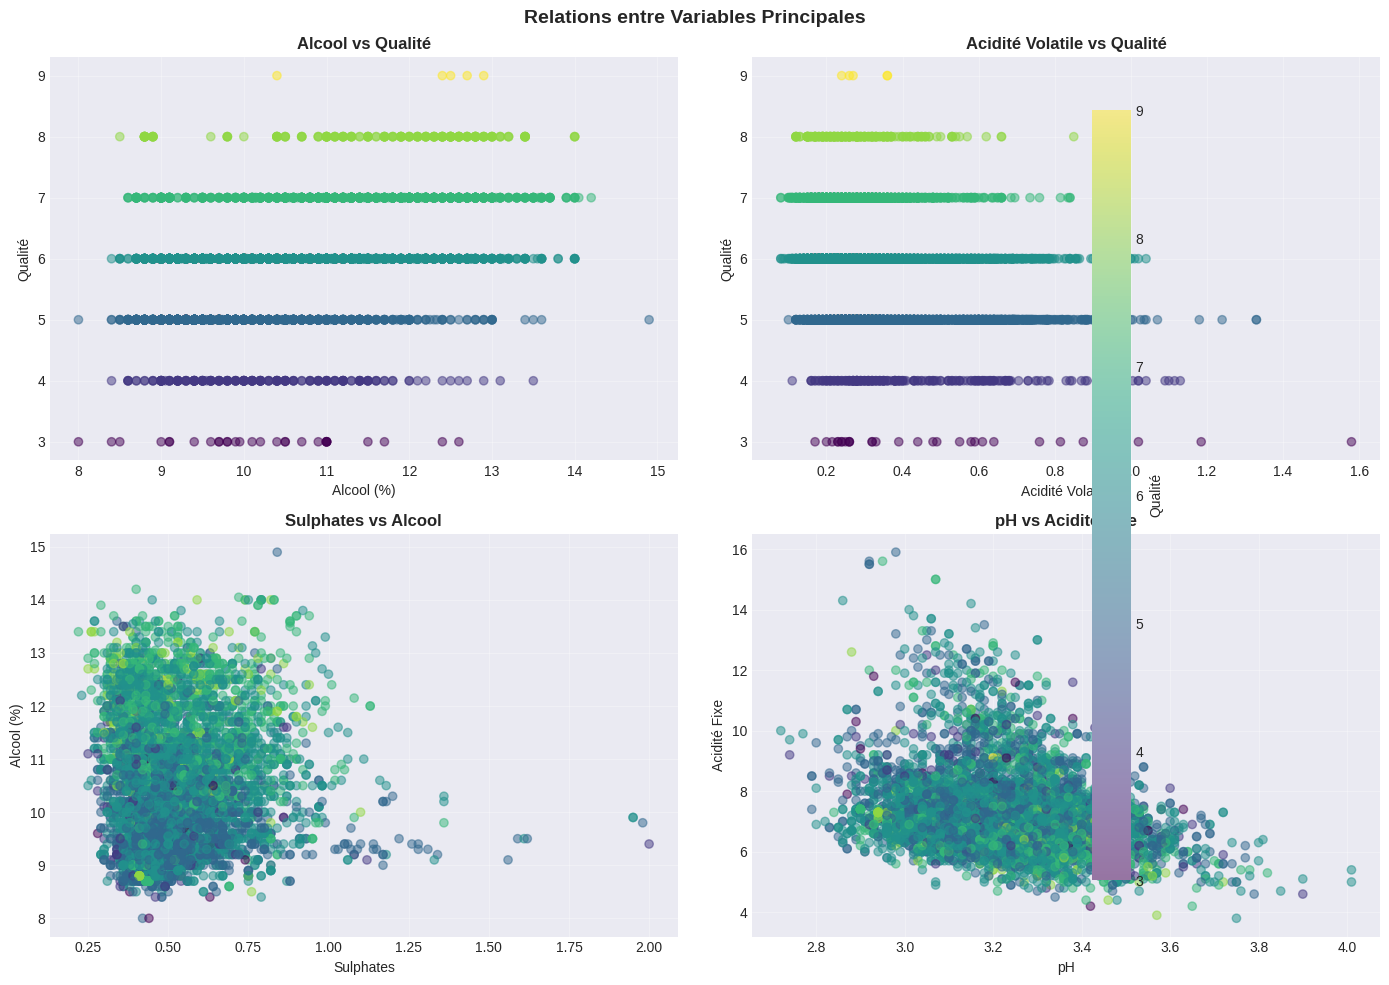

✓ Graphique 7 créé: Scatter plots

STATISTIQUES DESCRIPTIVES
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855    

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Chargement du dataset
print("Chargement du dataset Wine Quality...")
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

# Combinaison des features et de la target
df = pd.concat([X, y], axis=1)

# Ajout de la colonne color si disponible
if hasattr(wine_quality.data, 'original'):
    df_original = wine_quality.data.original
    if 'color' in df_original.columns:
        df['color'] = df_original['color']

print(f"Dataset chargé: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print("\n" + "="*70)

# ============================================================================
# GRAPHIQUE 1: Distribution de la qualité des vins
# ============================================================================
plt.figure(figsize=(10, 6))
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Score de Qualité', fontsize=12)
plt.ylabel('Nombre de Vins', fontsize=12)
plt.title('Distribution de la Qualité des Vins', fontsize=14, fontweight='bold')
plt.xticks(quality_counts.index)
plt.grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(quality_counts.values):
    plt.text(quality_counts.index[i], v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('1_distribution_qualite.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 1 créé: Distribution de la qualité")

# ============================================================================
# GRAPHIQUE 2: Matrice de corrélation
# ============================================================================
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('2_matrice_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 2 créé: Matrice de corrélation")

# ============================================================================
# GRAPHIQUE 3: Corrélation avec la qualité
# ============================================================================
plt.figure(figsize=(10, 8))
# Sélectionner uniquement les colonnes numériques pour la corrélation
df_numeric = df.select_dtypes(include=[np.number])
correlation_with_quality = df_numeric.corr()['quality'].drop('quality').sort_values()
colors = ['red' if x < 0 else 'green' for x in correlation_with_quality]
correlation_with_quality.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Coefficient de Corrélation', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title('Corrélation des Variables avec la Qualité', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('3_correlation_qualite.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 3 créé: Corrélation avec la qualité")

# ============================================================================
# GRAPHIQUE 4: Distribution des variables principales (histogrammes)
# ============================================================================
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

numeric_columns = df.select_dtypes(include=[np.number]).columns
for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_xlabel('Valeur')
        axes[idx].set_ylabel('Fréquence')
        axes[idx].grid(axis='y', alpha=0.3)

# Masquer les axes non utilisés
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution de Toutes les Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('4_distributions_variables.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 4 créé: Distributions des variables")

# ============================================================================
# GRAPHIQUE 5: Boxplots - Qualité vs Variables Clés
# ============================================================================
key_features = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        df.boxplot(column=feature, by='quality', ax=axes[idx])
        axes[idx].set_title(f'{feature} par Qualité', fontweight='bold')
        axes[idx].set_xlabel('Score de Qualité')
        axes[idx].set_ylabel(feature)
        axes[idx].get_figure().suptitle('')

plt.suptitle('Relation entre Variables Clés et Qualité', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('5_boxplots_qualite.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 5 créé: Boxplots par qualité")

# ============================================================================
# GRAPHIQUE 6: Comparaison Vins Rouges vs Blancs (si disponible)
# ============================================================================
if 'color' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Graphique 1: Distribution de la qualité par couleur
    df.groupby(['color', 'quality']).size().unstack(fill_value=0).plot(
        kind='bar', ax=axes[0, 0], color=['#8B0000', '#FFD700'])
    axes[0, 0].set_title('Distribution de la Qualité par Type de Vin', fontweight='bold')
    axes[0, 0].set_xlabel('Type de Vin')
    axes[0, 0].set_ylabel('Nombre de Vins')
    axes[0, 0].legend(title='Qualité', bbox_to_anchor=(1.05, 1))

    # Graphique 2: Alcool par couleur
    df.boxplot(column='alcohol', by='color', ax=axes[0, 1])
    axes[0, 1].set_title('Teneur en Alcool par Type de Vin', fontweight='bold')
    axes[0, 1].set_xlabel('Type de Vin')
    axes[0, 1].set_ylabel('Alcool (%)')
    axes[0, 1].get_figure().suptitle('')

    # Graphique 3: pH par couleur
    df.boxplot(column='pH', by='color', ax=axes[1, 0])
    axes[1, 0].set_title('pH par Type de Vin', fontweight='bold')
    axes[1, 0].set_xlabel('Type de Vin')
    axes[1, 0].set_ylabel('pH')
    axes[1, 0].get_figure().suptitle('')

    # Graphique 4: Qualité moyenne par couleur
    quality_by_color = df.groupby('color')['quality'].mean()
    quality_by_color.plot(kind='bar', ax=axes[1, 1], color=['#8B0000', '#FFD700'], edgecolor='black')
    axes[1, 1].set_title('Qualité Moyenne par Type de Vin', fontweight='bold')
    axes[1, 1].set_xlabel('Type de Vin')
    axes[1, 1].set_ylabel('Qualité Moyenne')
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

    plt.suptitle('Comparaison Vins Rouges vs Blancs', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('6_comparaison_rouge_blanc.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Graphique 6 créé: Comparaison rouge vs blanc")
else:
    print("⚠ Variable 'color' non disponible - Graphique 6 ignoré")

# ============================================================================
# GRAPHIQUE 7: Scatter plots - Relations entre variables
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Alcool vs Qualité
axes[0, 0].scatter(df['alcohol'], df['quality'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[0, 0].set_xlabel('Alcool (%)')
axes[0, 0].set_ylabel('Qualité')
axes[0, 0].set_title('Alcool vs Qualité', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Acidité volatile vs Qualité
axes[0, 1].scatter(df['volatile_acidity'], df['quality'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[0, 1].set_xlabel('Acidité Volatile')
axes[0, 1].set_ylabel('Qualité')
axes[0, 1].set_title('Acidité Volatile vs Qualité', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Sulphates vs Alcool
scatter = axes[1, 0].scatter(df['sulphates'], df['alcohol'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[1, 0].set_xlabel('Sulphates')
axes[1, 0].set_ylabel('Alcool (%)')
axes[1, 0].set_title('Sulphates vs Alcool', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# pH vs Acidité fixe
axes[1, 1].scatter(df['pH'], df['fixed_acidity'], alpha=0.5, c=df['quality'], cmap='viridis')
axes[1, 1].set_xlabel('pH')
axes[1, 1].set_ylabel('Acidité Fixe')
axes[1, 1].set_title('pH vs Acidité Fixe', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Qualité')
plt.suptitle('Relations entre Variables Principales', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('7_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique 7 créé: Scatter plots")

# ============================================================================
# STATISTIQUES RÉCAPITULATIVES
# ============================================================================
print("\n" + "="*70)
print("STATISTIQUES DESCRIPTIVES")
print("="*70)
print(df.describe())

print("\n" + "="*70)
print("RÉPARTITION PAR QUALITÉ")
print("="*70)
print(df['quality'].value_counts().sort_index())

if 'color' in df.columns:
    print("\n" + "="*70)
    print("RÉPARTITION PAR TYPE DE VIN")
    print("="*70)
    print(df['color'].value_counts())

print("\n" + "="*70)
print("✓ Tous les graphiques ont été créés avec succès!")
print("✓ Les fichiers PNG ont été sauvegardés dans le répertoire courant")
print("="*70)